# Nobel Prize Analysis

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [103]:
nobel_df = pd.read_pickle("nobel_df_listed.pkl")
#Reading the file

In [104]:
print(nobel_df)

                                    category nominator_city  \
0           Nomination for Nobel Peace Prize             []   
1      Nomination for Nobel Prize in Physics             []   
2      Nomination for Nobel Prize in Physics             []   
3      Nomination for Nobel Prize in Physics             []   
4      Nomination for Nobel Prize in Physics             []   
...                                      ...            ...   
18347       Nomination for Nobel Peace Prize         [Oslo]   
18348       Nomination for Nobel Peace Prize         [Oslo]   
18349       Nomination for Nobel Peace Prize             []   
18350       Nomination for Nobel Peace Prize             []   
18351       Nomination for Nobel Peace Prize             []   

      nominator_comments      nominator_country nominator_department  \
0                     []          [SWEDEN (SE)]                   []   
1                     []         [FINLAND (FI)]                   []   
2                     []  [

In [105]:
nobel_df.columns

Index(['category', 'nominator_city', 'nominator_comments', 'nominator_country',
       'nominator_department', 'nominator_gender', 'nominator_name',
       'nominator_profession', 'nominator_state', 'nominator_university',
       'nominator_yearbirth', 'nominator_yeardeath', 'nominee_city',
       'nominee_comments', 'nominee_country', 'nominee_department',
       'nominee_gender', 'nominee_motivation', 'nominee_name',
       'nominee_profession', 'nominee_state', 'nominee_university',
       'nominee_yearbirth', 'nominee_yeardeath', 'prizestatusnominee', 'url',
       'year'],
      dtype='object')

In [106]:
def make_1D(col):
    return pd.Series([item for list in col for item in list])

In [18]:
nom_country = make_1D(nobel_df['nominator_country'])
print(nom_country)

0                SWEDEN (SE)
1               FINLAND (FI)
2        UNITED KINGDOM (GB)
3         UNITED STATES (US)
4         UNITED STATES (US)
                ...         
18433            SWEDEN (SE)
18434            NORWAY (NO)
18435            NORWAY (NO)
18436             ITALY (IT)
18437             INDIA (IN)
Length: 18438, dtype: object


In [24]:
nominator_country_top20 = nom_country.value_counts().nlargest(n=20)
print(nominator_country_top20)
    

GERMANY (DE)                                  2694
UNITED STATES (US)                            2661
FRANCE (FR)                                   2376
SWEDEN (SE)                                   1652
UNITED KINGDOM (GB)                           1355
ITALY (IT)                                     864
SWITZERLAND (CH)                               813
NORWAY (NO)                                    708
AUSTRIA (AT)                                   549
NETHERLANDS (NL)                               514
BELGIUM (BE)                                   480
DENMARK (DK)                                   448
FINLAND (FI)                                   366
SPAIN (ES)                                     307
POLAND (PL)                                    291
CZECH REPUBLIC (CZ)                            246
JAPAN (JP)                                     214
HUNGARY (HU)                                   161
U.S.S.R. (SU)  now RUSSIAN FEDERATION (RU)     146
CANADA (CA)                    

In [42]:
count = 0
for i in nominator_country_top20.index:
    print(i + ", " + str(nominator_country_top20.values[count]))
    count += 1

GERMANY (DE), 2694
UNITED STATES (US), 2661
FRANCE (FR), 2376
SWEDEN (SE), 1652
UNITED KINGDOM (GB), 1355
ITALY (IT), 864
SWITZERLAND (CH), 813
NORWAY (NO), 708
AUSTRIA (AT), 549
NETHERLANDS (NL), 514
BELGIUM (BE), 480
DENMARK (DK), 448
FINLAND (FI), 366
SPAIN (ES), 307
POLAND (PL), 291
CZECH REPUBLIC (CZ), 246
JAPAN (JP), 214
HUNGARY (HU), 161
U.S.S.R. (SU)  now RUSSIAN FEDERATION (RU), 146
CANADA (CA), 136


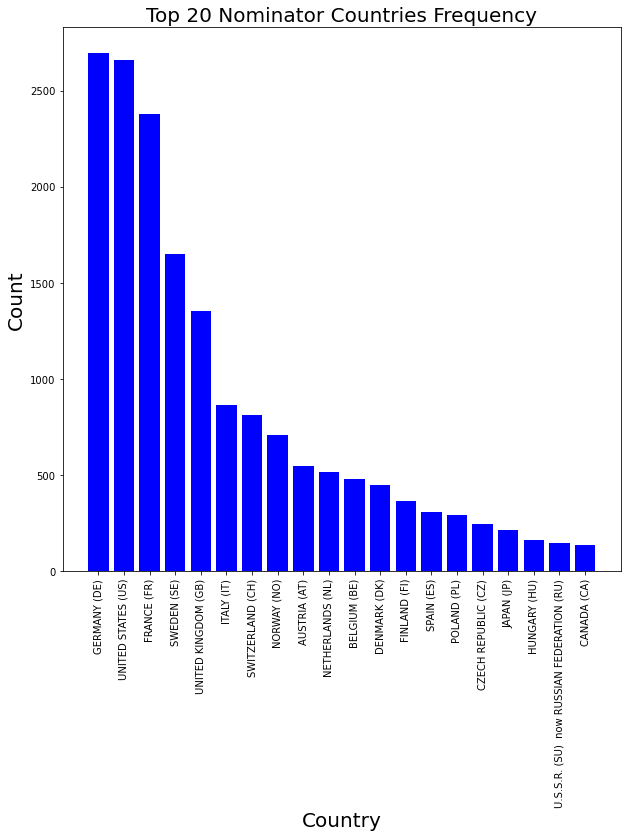

In [71]:
count = 0
plt.figure(figsize=(10, 10))
for i in nominator_country_top20.index:
    plt.bar(nominator_country_top20.index[count],nominator_country_top20.values[count], color='blue')
    count = count + 1

plt.title('Top 20 Nominator Countries Frequency', fontsize = 20)
plt.xlabel('Country', fontsize = 20)
plt.xticks(rotation = 90)
plt.ylabel('Count', fontsize = 20)
plt.show() 

In [73]:
nominee_country = make_1D(nobel_df['nominee_country'])
print(nominee_country)

0          SWITZERLAND (CH)
1               SWEDEN (SE)
2              GERMANY (DE)
3        UNITED STATES (US)
4        UNITED STATES (US)
                ...        
20875      SWITZERLAND (CH)
20876      SWITZERLAND (CH)
20877           FRANCE (FR)
20878           FRANCE (FR)
20879    UNITED STATES (US)
Length: 20880, dtype: object


In [75]:
nominee_country_top20 = nominee_country.value_counts().nlargest(n=20)
print(nominee_country_top20)

UNITED STATES (US)                            4908
GERMANY (DE)                                  3431
FRANCE (FR)                                   2803
UNITED KINGDOM (GB)                           2125
SWITZERLAND (CH)                               981
ITALY (IT)                                     807
SWEDEN (SE)                                    745
AUSTRIA (AT)                                   607
NETHERLANDS (NL)                               490
BELGIUM (BE)                                   457
DENMARK (DK)                                   435
NORWAY (NO)                                    320
POLAND (PL)                                    268
SPAIN (ES)                                     249
RUSSIAN FEDERATION (RU)                        238
U.S.S.R. (SU)  now RUSSIAN FEDERATION (RU)     213
JAPAN (JP)                                     192
CZECH REPUBLIC (CZ)                            172
FINLAND (FI)                                   165
INDIA (IN)                     

In [76]:
count = 0
for i in nominee_country_top20.index:
    print(i + ", " + str(nominee_country_top20.values[count]))
    count += 1

UNITED STATES (US), 4908
GERMANY (DE), 3431
FRANCE (FR), 2803
UNITED KINGDOM (GB), 2125
SWITZERLAND (CH), 981
ITALY (IT), 807
SWEDEN (SE), 745
AUSTRIA (AT), 607
NETHERLANDS (NL), 490
BELGIUM (BE), 457
DENMARK (DK), 435
NORWAY (NO), 320
POLAND (PL), 268
SPAIN (ES), 249
RUSSIAN FEDERATION (RU), 238
U.S.S.R. (SU)  now RUSSIAN FEDERATION (RU), 213
JAPAN (JP), 192
CZECH REPUBLIC (CZ), 172
FINLAND (FI), 165
INDIA (IN), 139


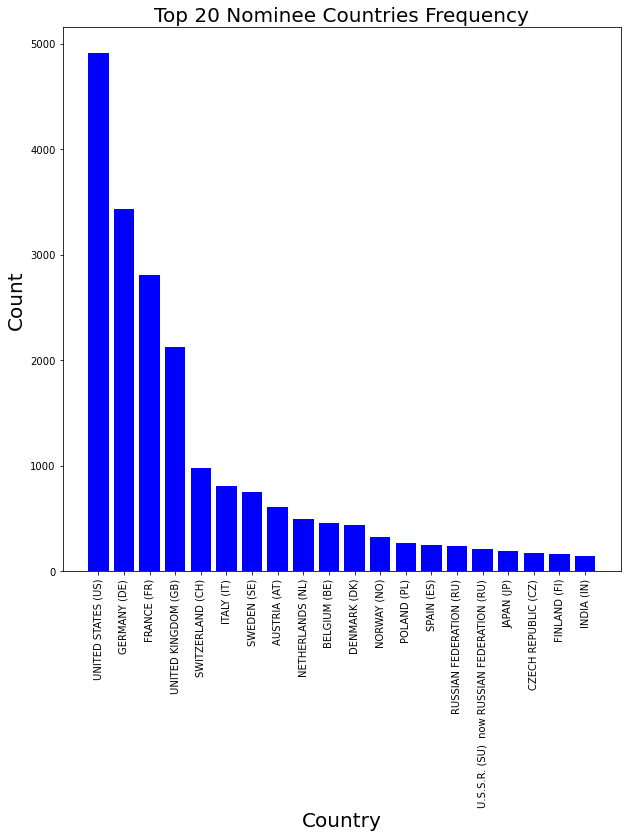

In [77]:
count = 0
plt.figure(figsize=(10, 10))
for i in nominee_country_top20.index:
    plt.bar(nominee_country_top20.index[count],nominee_country_top20.values[count], color='blue')
    count = count + 1

plt.title('Top 20 Nominee Countries Frequency', fontsize = 20)
plt.xlabel('Country', fontsize = 20)
plt.xticks(rotation = 90)
plt.ylabel('Count', fontsize = 20)
plt.show() 

In [78]:
nominee_gender = make_1D(nobel_df['nominee_gender'])
print(nominee_gender)

0        M
1        M
2        M
3        M
4        M
        ..
20916    M
20917    M
20918    M
20919    M
20920    M
Length: 20921, dtype: object


In [82]:
nominee_gender_series = nominee_gender.value_counts(normalize= True) * 100
print(nominee_gender_series)

M    95.669423
F     4.325797
<     0.004780
dtype: float64


In [83]:
count = 0
for i in nominee_gender_series.index:
    print(i + ", " + str(nominee_gender_series.values[count]))
    count += 1

M, 95.66942306773099
F, 4.325797046030305
<, 0.004779886238707519


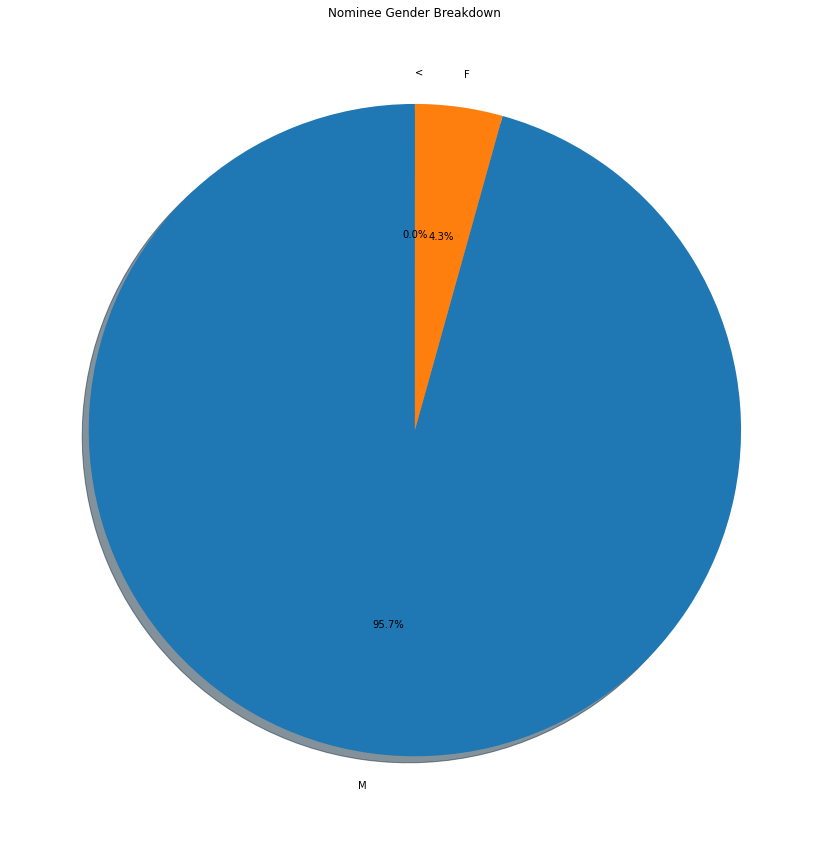

In [96]:
plt.figure(figsize=(15, 15))
plt.pie(nominee_gender_series.values, labels=nominee_gender_series.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Nominee Gender Breakdown')
plt.show() 

In [100]:
print(nobel_df.category)
print(nobel_df.year)

0             Nomination for Nobel Peace Prize
1        Nomination for Nobel Prize in Physics
2        Nomination for Nobel Prize in Physics
3        Nomination for Nobel Prize in Physics
4        Nomination for Nobel Prize in Physics
                         ...                  
18347         Nomination for Nobel Peace Prize
18348         Nomination for Nobel Peace Prize
18349         Nomination for Nobel Peace Prize
18350         Nomination for Nobel Peace Prize
18351         Nomination for Nobel Peace Prize
Name: category, Length: 18352, dtype: object
0        1959
1        1901
2        1901
3        1901
4        1901
         ... 
18347    1964
18348    1964
18349    1964
18350    1964
18351    1964
Name: year, Length: 18352, dtype: int64


In [101]:
category= nobel_df.category
year = nobel_df.year
physics_cat = category[category=='Nomination for Nobel Prize in Physics']

1       Nomination for Nobel Prize in Physics
2       Nomination for Nobel Prize in Physics
3       Nomination for Nobel Prize in Physics
4       Nomination for Nobel Prize in Physics
5       Nomination for Nobel Prize in Physics
                        ...                  
2779    Nomination for Nobel Prize in Physics
2780    Nomination for Nobel Prize in Physics
2781    Nomination for Nobel Prize in Physics
2782    Nomination for Nobel Prize in Physics
2783    Nomination for Nobel Prize in Physics
Name: category, Length: 2783, dtype: object